# Ejercicio 1

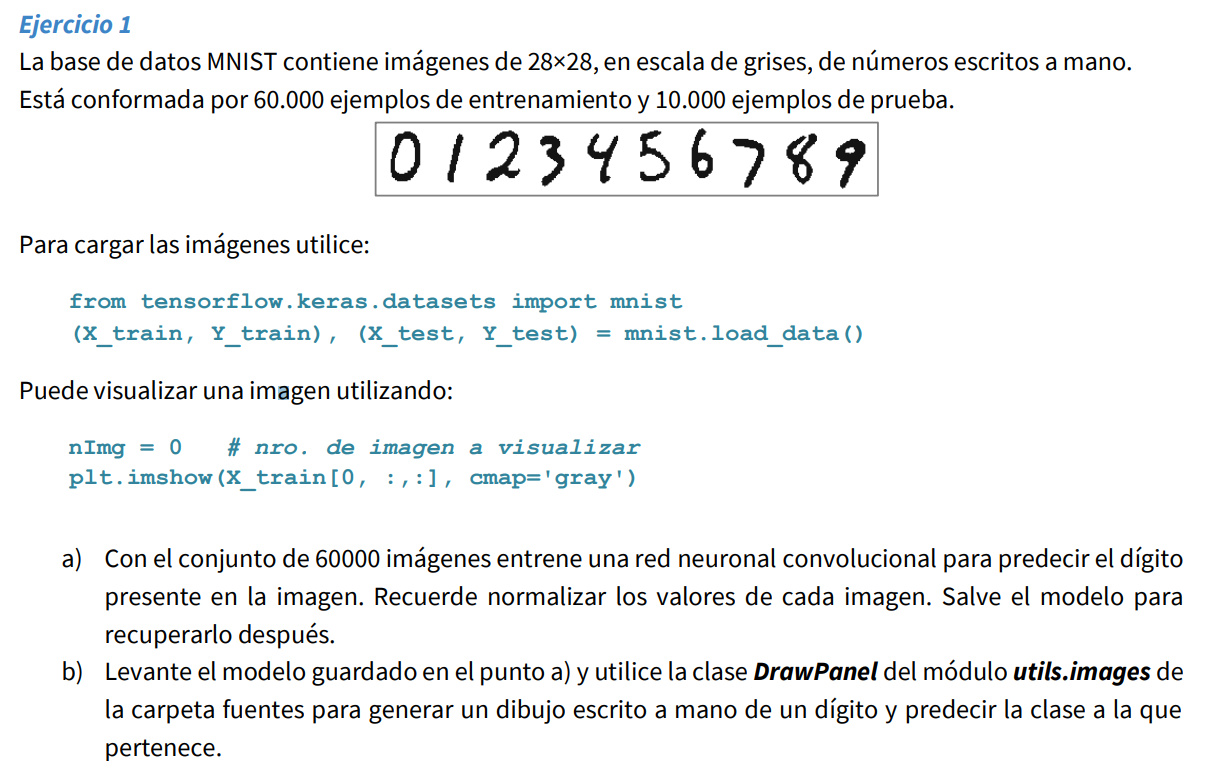

### Importe de librerias y lectura de datos

In [42]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [43]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn import metrics
import seaborn as sns

import  matplotlib.pyplot as plt
import numpy as np

### Preparacion de dataset

In [44]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #cargo el dataset de tensorflow

Y_train= to_categorical(np.array(Y_train))
Y_test = to_categorical(np.array(Y_test))

In [45]:
# dimension de las imagenes sacadas del primer ejmeplo
IMG_SHAPE = X_train[0].shape # (28,28)
TARGET_CNT= len(Y_train[0])  # 10 dígitos/clases

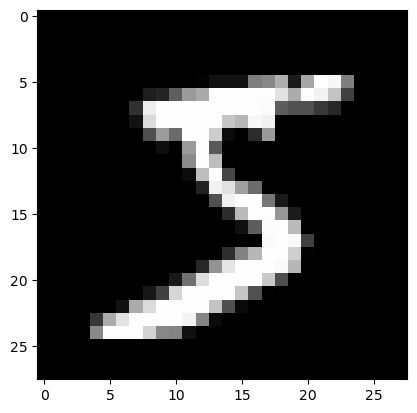

In [46]:
# nro. de imagen a visualizar
plt.imshow(X_train[0, :,:], cmap='gray')

In [47]:
# normalización
X_train = X_train / 255
X_test  = X_test  / 255

In [69]:
# %% Construccion del modelo
'''
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu', input_shape=[*IMG_SHAPE, 1] ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='leaky_relu'))
model.add(Dense(TARGET_CNT, activation='softmax'))
'''
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=[*IMG_SHAPE, 1] ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='leaky_relu'))
model.add(Dense(TARGET_CNT, activation='softmax'))


#compilacion
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )


c:\Users\VICTUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
LOTES  = 32
EPOCAS = 25

from livelossplot import PlotLossesKeras
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)

# %% Entrenamiento del modelo usando datos de entrenamiento y validacion
H = model.fit(x=X_train, y=Y_train, batch_size=LOTES,
              epochs=EPOCAS, validation_split=0.2, callbacks=[es], verbose=0)


(60000, 28, 28)
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step


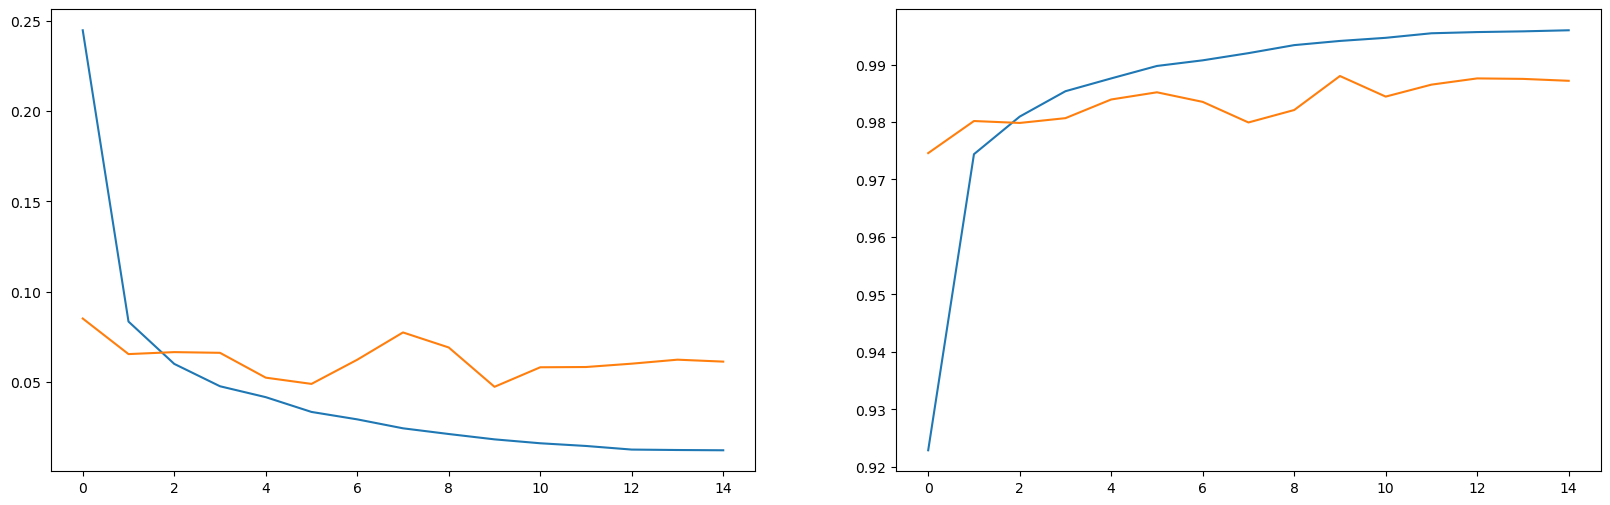

<Figure size 640x480 with 0 Axes>

In [71]:
fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")


print (X_train.shape)
pred = model.predict(X_train)


<Axes: >

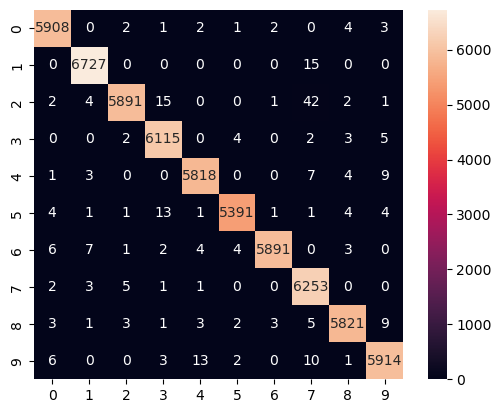

In [72]:
cm = metrics.confusion_matrix(np.argmax(Y_train, axis=1), np.argmax(pred, axis=1))
plt.figure()
sns.heatmap(cm, square=True,  annot=True, fmt='d')

In [73]:
# %% evalua el modelo para entrenamiento y testeo
pred = model.evaluate(X_train, Y_train, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de validacion
pred = model.evaluate(X_test, Y_test, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))


Efectividad del modelo con datos de entrenamiento:  99.55%
Efectividad del modelo con datos de Prueba.......:  98.62%


Guardo el modelo para usarlo

In [74]:
model.save('MNIST_conv_model.h5')

Recupero el modelo guardado

In [75]:
from tensorflow.keras.models import load_model

model = load_model('MNIST_conv_model.h5')

Abro panel de dibujo y realizo prediccion

In [92]:
import pygame
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

# Inicializar pygame
pygame.init()

# Dimensiones del panel de dibujo (ajustado para 200x200 píxeles)
WIDTH, HEIGHT = 200, 200
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

# Crear la pantalla
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Dibuja un dígito")

# Llenar la pantalla de blanco
screen.fill(WHITE)

# Variable para salir del bucle
drawing = False

def draw_circle(screen, x, y):
    pygame.draw.circle(screen, BLACK, (x, y), 10)

# Bucle principal de pygame
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        # Iniciar el dibujo al hacer clic
        if event.type == pygame.MOUSEBUTTONDOWN:
            drawing = True

        # Detener el dibujo al soltar el botón
        if event.type == pygame.MOUSEBUTTONUP:
            drawing = False

        # Dibujar mientras el mouse se mueve y el botón está presionado
        if event.type == pygame.MOUSEMOTION and drawing:
            x, y = event.pos
            draw_circle(screen, x, y)

    pygame.display.update()

# Guardar la imagen dibujada
pygame.image.save(screen, "digit.png")

# Cerrar pygame
pygame.quit()


# Cargar la imagen y redimensionarla a 28x28 para el modelo
img = Image.open("digit.png").convert('L')  # Convertir a escala de grises
img = img.resize((28, 28))  # Redimensionar a 28x28
img_array = np.array(img)

# Invertir los colores (si lo dibujas en negro sobre fondo blanco)
img_array = 255 - img_array

# Normalizar la imagen
img_array = img_array / 255.0

# Redimensionar la imagen para que tenga la forma correcta (1, 28, 28, 1)
img_array = img_array.reshape(1, 28, 28, 1)

# Cargar el modelo de TensorFlow
model = load_model('MNIST_conv_model.h5')

# Hacer la predicción
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

print(f"El dígito predicho es: {predicted_class[0]}") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
El dígito predicho es: 7
